# A Conditional workflow model
Here we are attempting to create a conditional workflow model without using any LLM. Where we try to create a review system for articles.

### 1. Import dependencies

In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import Literal                                  # This will be required to declare the return type of the conditional function
from typing import TypedDict

In [2]:
import nest_asyncio
nest_asyncio.apply()
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import Image

### 2. Create a state

In [3]:
class QuadState(TypedDict):                      # The QuadState inherits a TypedDict
    a : int
    b : int
    c : int
    equation : str
    discriminant : float
    result : str

### 3. Define the function for the graph node

In [4]:
# Here instead of returning the entire state, we are returning partial updates in the form of dictionary items of the altered values only

def show_eq(state: QuadState) -> QuadState:
    str = f"{state["a"]} x^2 + {state["b"]}x + {state["c"]}"
    return {"equation" : str}


def calc_discriminant(state: QuadState) -> QuadState:
    d = (state["b"] ** 2) - (4 * state["a"] * state["c"])
    return {"discriminant" : d}

def non_real_roots(state: QuadState) -> QuadState:
    return {"result" : "The equation has no real roots."}

def identical_roots(state: QuadState) -> QuadState:
    root = -state["b"] / (2 * state["a"])
    return {"result" : f"The equation has one root: {root}."}

def real_roots(state: QuadState) -> QuadState:
    root1 = (-state["b"] + state["discriminant"] ** 0.5) / (2 * state["a"])
    root2 = (-state["b"] - state["discriminant"] ** 0.5) / (2 * state["a"])
    return {"result" : f"The equation has two real roots: {root1} and {root2}."}

### 4. Define the conditional function

In [ ]:
def check_cond(state: QuadState) -> Literal["non_real_roots", "identical_roots", "real_roots"]:                 # The return type will be a Literal containing the name of the function to which the control is to be diverted.
    if state["discriminant"] == 0:
        return "identical_roots"
    elif state["discriminant"] > 0:
        return "real_roots"
    else:
        return "non_real_roots"

### 5. Create the graph

In [ ]:
# Declare the graph:
graph = StateGraph(QuadState)                    # The StateGraph takes the state as a parameter, signifying that the "state" will be exchanged between the nodes through the edges.

# Add a nodes/states to the graph:
graph.add_node("show_eq", show_eq)
graph.add_node("calc_discriminant", calc_discriminant)
graph.add_node("non_real_roots", non_real_roots)
graph.add_node("identical_roots", identical_roots)
graph.add_node("real_roots", real_roots)


# Add the sequential edges:
graph.add_edge(START, "show_eq")
graph.add_edge("show_eq", "calc_discriminant")


# Add the conditional edges:
graph.add_conditional_edges("calc_discriminant", check_cond)                    # We use this method to define the conditional edges. You may notice in the graph that this method creates three edges (dotted).


graph.add_edge("non_real_roots", END)
graph.add_edge("identical_roots", END)
graph.add_edge("real_roots", END)

### 6. Compile the graph

In [7]:
workflow = graph.compile()

### 7. The Graph

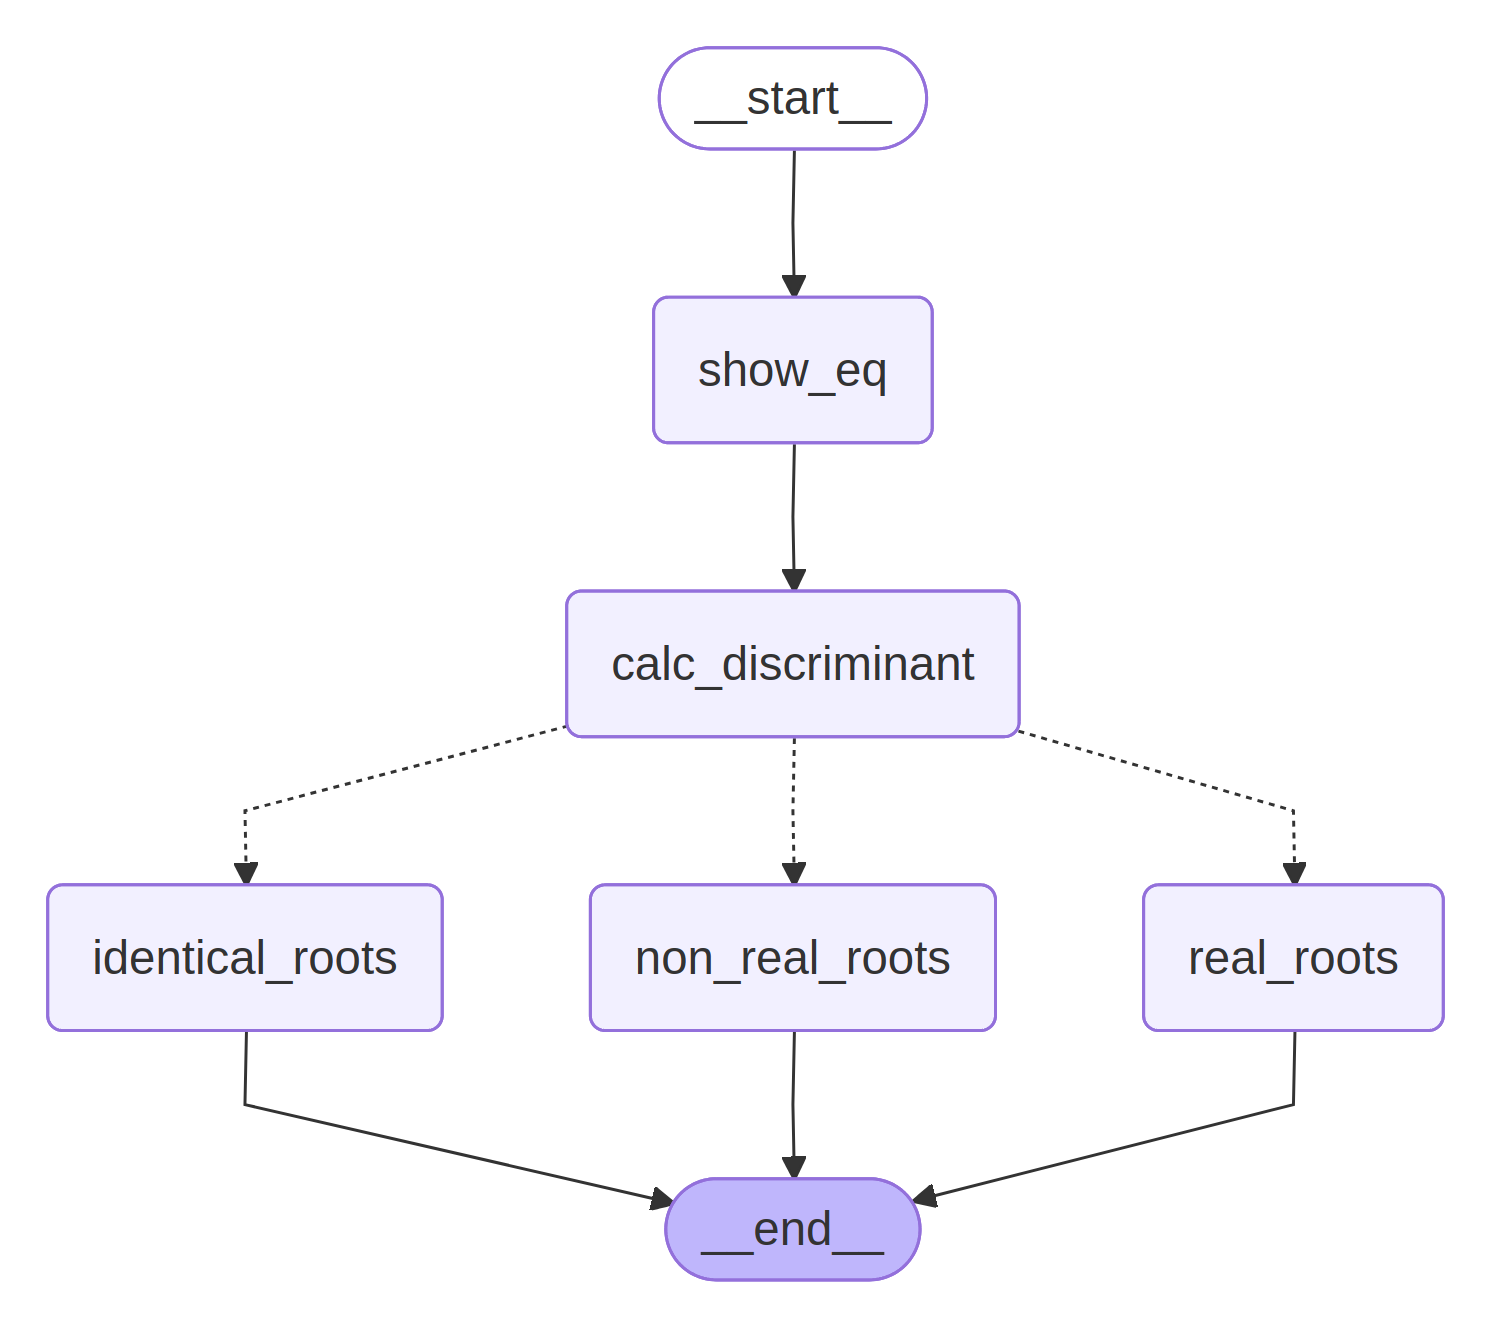

In [8]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER))

### 8. Run the code

In [9]:
initial_state = {"a": 1, "b": -3, "c": 2}
final_state = workflow.invoke(initial_state)
print(final_state)

{'a': 1, 'b': -3, 'c': 2, 'equation': '1 x^2 + -3x + 2', 'discriminant': 1, 'result': 'The equation has two real roots: 2.0 and 1.0.'}


In [10]:
print(final_state["equation"])


1 x^2 + -3x + 2


In [11]:
print(final_state["discriminant"])

1


In [12]:
print(final_state["result"])

The equation has two real roots: 2.0 and 1.0.


In [13]:
initial_state = {"a": -2, "b": -3, "c": -4}
final_state = workflow.invoke(initial_state)
print(final_state)

{'a': -2, 'b': -3, 'c': -4, 'equation': '-2 x^2 + -3x + -4', 'discriminant': -23, 'result': 'The equation has no real roots.'}


In [14]:
print(final_state["equation"])

-2 x^2 + -3x + -4


In [15]:
print(final_state["discriminant"])

-23


In [16]:
print(final_state["result"])

The equation has no real roots.


In [17]:
initial_state = {"a": 1, "b": -8, "c": 16}
final_state = workflow.invoke(initial_state)
print(final_state)

{'a': 1, 'b': -8, 'c': 16, 'equation': '1 x^2 + -8x + 16', 'discriminant': 0, 'result': 'The equation has one root: 4.0.'}


In [18]:
print(final_state["equation"])

1 x^2 + -8x + 16


In [19]:
print(final_state["discriminant"])

0


In [20]:
print(final_state["result"])

The equation has one root: 4.0.
